In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
%load_ext rpy2.ipython

# Literate programming in notebooks

Literate programming in a notebook mixes documentation sections (like this cell) with code sections (like the next cell). Documentation sections provide useful information while the code sections can generate analytic values, tables and figures. Finally the whole notebook can be exported into documents of various formats.

Some examples of what you can put in a notebook follow:

## Explanation of the math

The physical analogy considers the negative log likelihood of the target distribution $p(x)$ to correspond to a potential energy well, with a collection of particles moving on the surface of the well. The state of each particle is given only by its position and momentum (or velocity if we assume unit mass for each particle). In a Hamiltonian system, the total energy $H(x,, v) = U(x) + K(v)$ is conserved. From statistical mechanics, the probability of each state is related to the total energy of the system

\begin{align}
p(x, v) & \propto e^{-H(x, v)} \\
&= e^{-U(x) - K(v)} \\
&= e^{-P(x)}e^{-K(v)} \\
& \propto p(x) \, p(v)
\end{align}

Since the joint distribution factorizes $p(x, v) = p(x)\, p(v)$, we can select an initial random $v$ for a particle, numerically integrate using a finite difference method such as the leapfrog and then use the updated $x^*$ as the new proposal. The acceptance ratio for the new $x^*$ is

$$
\frac{ e^{ -U(x^*)-K(v^*) }} { e^{-U(x)-K(v)} } = e^{U(x)-U(x^*)+K(x)-K(x^*)}
$$

If our finite difference scheme was exact, the acceptance ration would be 1 since energy is conserved with Hamiltonian dynamics. However, as we have seen, the leapfrog method does not conserve energy perfectly and an accept/reject step is still needed.

## Formatted code

```cpp
#include <pybind11/pybind11.h>
#include <pybind11/eigen.h>

#include <Eigen/Cholesky>
#include <random>

namespace py = pybind11;

Eigen::MatrixXd mvn(Eigen::VectorXd mu, Eigen::MatrixXd sigma, int n) {
    std::default_random_engine generator;
    std::normal_distribution<double> distribution(0, 1);

    Eigen::MatrixXd A(sigma.llt().matrixL());
    int p = mu.size();
            
    Eigen::MatrixXd Z(n, p);
    for (int i=0; i<n; i++) {
        Eigen::VectorXd v(p);
        for (int j=0; j<p; j++) {
            v[j] = distribution(generator);
        }
        Z.row(i) = mu + A*v;
    }
    return Z;
}


PYBIND11_PLUGIN(rng) {
    pybind11::module m("rng", "auto-compiled c++ extension");
    m.def("mvn", &mvn);
    return m.ptr();
}
```

## Images from the web

![Duke](DukeWest360.jpg)

> By Bluedog423 - Own work, Public Domain, https://commons.wikimedia.org/w/index.php?curid=866025

## Mix and match Python and R (and other languages)

### Tables with Python

In [3]:
from collections import Counter
from string import punctuation

table = {ord(char): None for char in punctuation}

words = []
with open('slides.md') as f:
    for line in f:
        words.append(line.strip().translate(table).lower().split())
    words = (word for sublist in words for word in sublist)
    counts = Counter(words)
    
df = pd.DataFrame(dict(counts=counts))
df.sort_values('counts', ascending=False)[:10]

,counts
the,30
data,29
classfragment,28
element,28
and,24
for,24
you,23
analysis,20
a,19
is,17


### Graphics with R

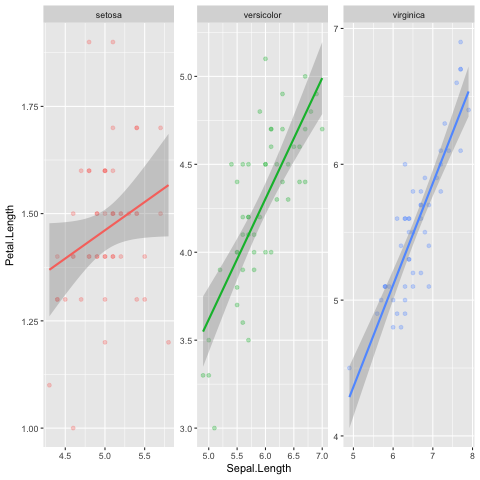

In [4]:
%%R

library(ggplot2)

ggplot(iris, aes(x=Sepal.Length, y=Petal.Length, color=Species)) +
geom_point(alpha=0.3) + 
stat_smooth(method = lm, se = 0.9) +
facet_wrap(~ Species, scales = "free") +
guides(color=F)

## Even videos can be included

In [12]:
from IPython.display import YouTubeVideo

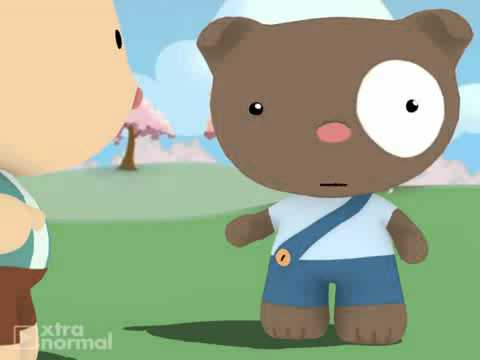

In [14]:
YouTubeVideo('Hz1fyhVOjr4')